# This notebook compares the V15 and V20 prediction errors for different bitstrings

#### Load the data

In [3]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')

#### Create a plotting function

In [11]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

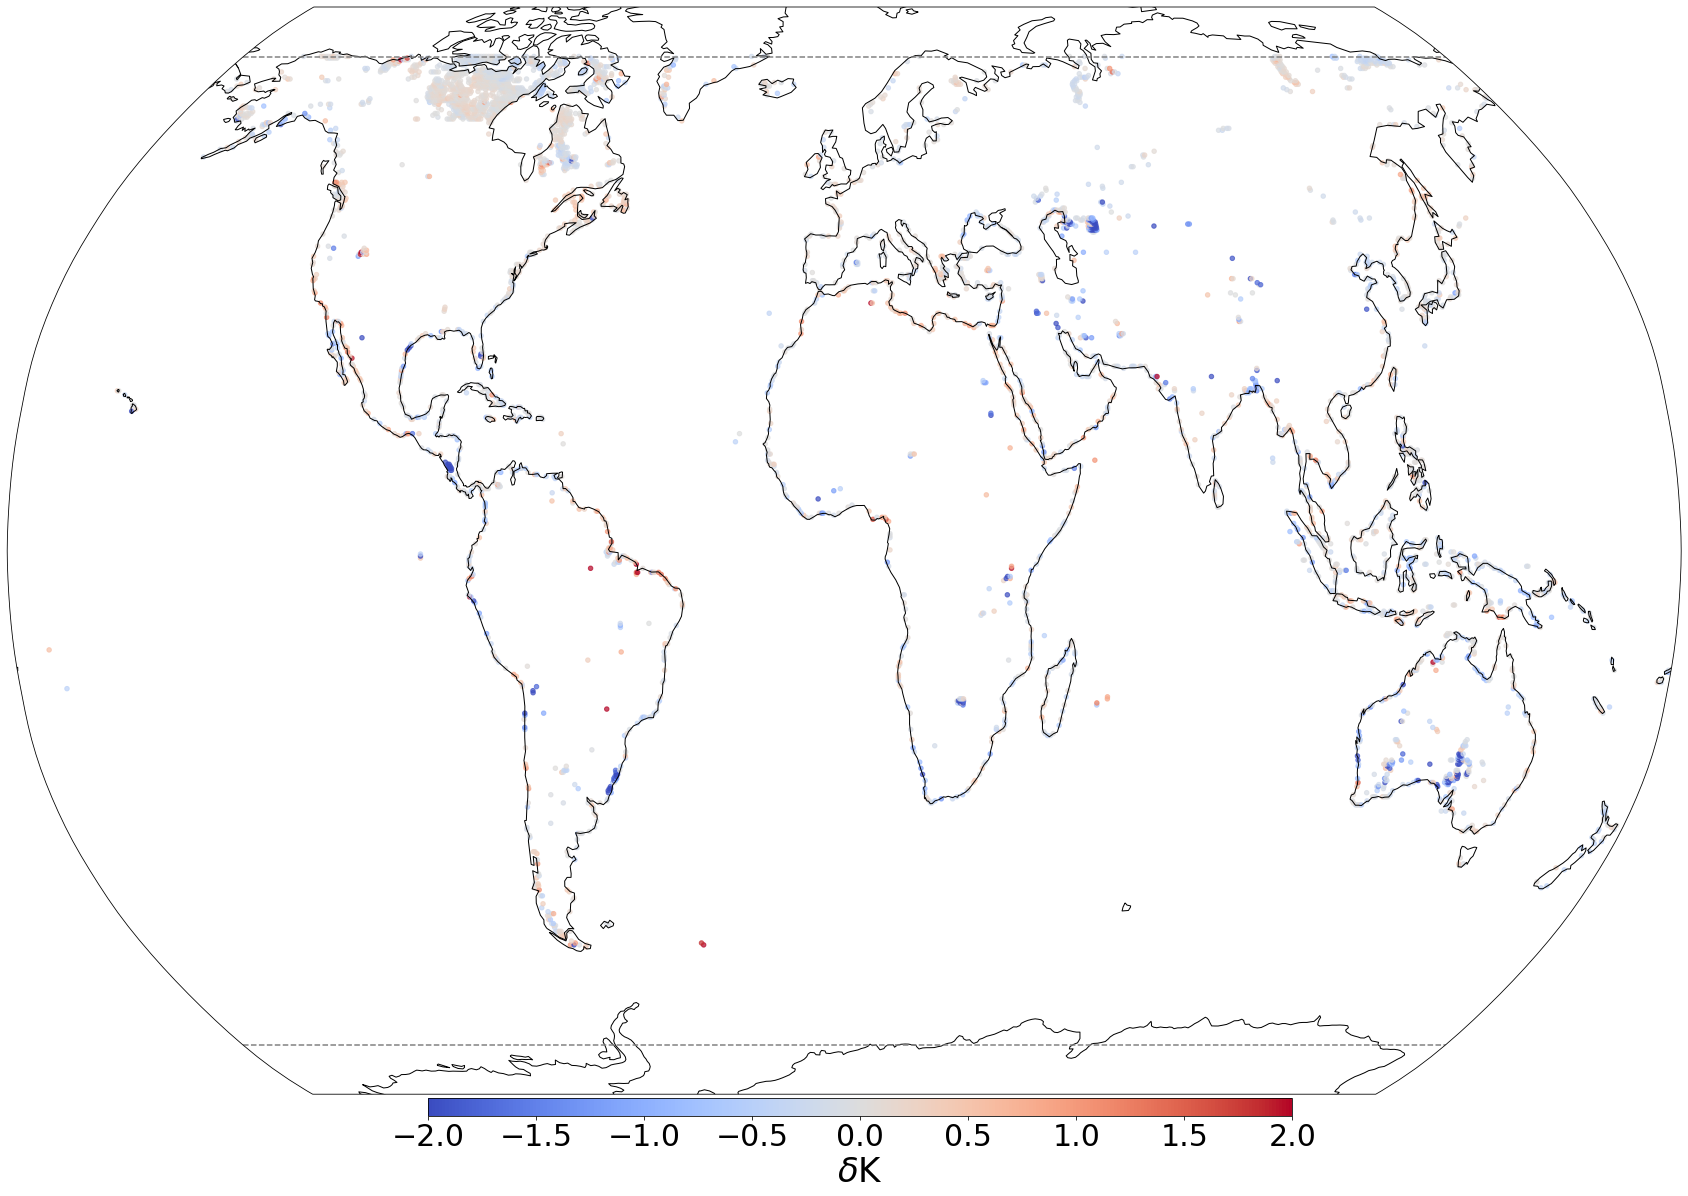

In [13]:
RobinsonPlot(df.query('abs(change_in_cl) > 0.1'),'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None)

In [14]:
df_delta_cl = df.query('abs(change_in_cl) > 0.1')
df_delta_cl.to_csv('tmp_data/model_change_in_cl01.csv')

## Bitstring 100110 

In [4]:
df_1100110 = df.query('bitstring == "100110"')

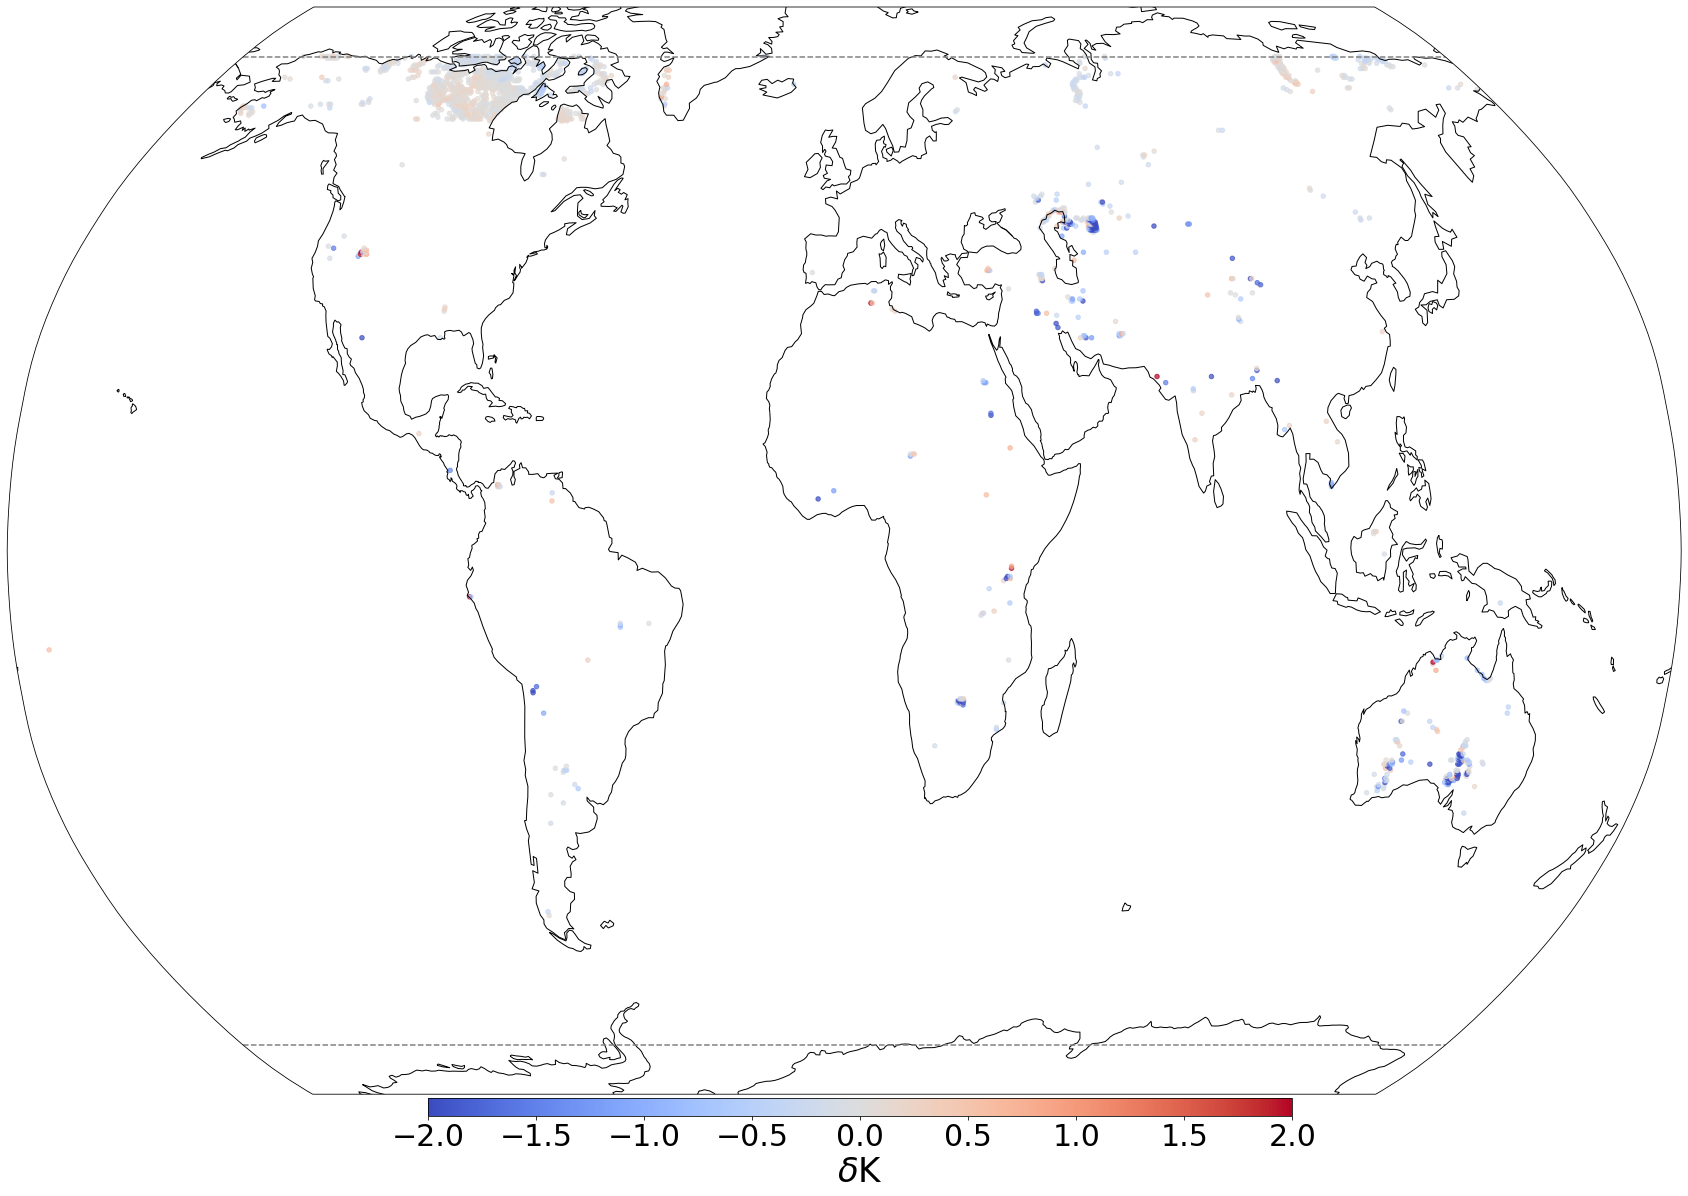

In [5]:
RobinsonPlot(df_1100110,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/bitstring_100110.png')

#### Check out some of the worst points - these are mentioned in the manuscript

In [6]:
ivals = [0,1,2,3]  # #Gujarat, Salt lake city, Peru, Northern Algeria
i = 0
df_1100110.sort_values(by=['delta'],ascending=False).iloc[i]

latitude_ERA                        24.028095
longitude_ERA                            69.0
MODIS_LST                          313.732483
V15_prediction                     309.048828
V20_prediction                     303.119598
V20X_prediction                    301.872253
V15_error                             5.62142
V20_error                            10.74507
V20X_error                          11.894302
delta                                5.123649
deltaX                               6.272882
values                                 162045
step                          0 days 00:00:00
surface                                   0.0
latitude                            24.028095
longitude                                69.0
change_in_cl                         0.121381
V15_cl                                0.59056
V20_cl                               0.711941
percentage_change_in_cl              0.205536
heightAboveGround                        10.0
change_in_si10                    

In [9]:
df_1100110.sort_values(by=['delta'],ascending=False).iloc[4]

latitude_ERA                       -15.316154
longitude_ERA                       127.96875
MODIS_LST                          315.755646
V15_prediction                     315.930725
V20_prediction                     320.098053
V20X_prediction                    320.964966
V15_error                            2.279654
V20_error                            4.595093
V20X_error                           5.422447
delta                                2.315439
deltaX                               3.142792
values                                 340615
step                          0 days 00:00:00
surface                                   0.0
latitude                           -15.316154
longitude                           127.96875
change_in_cl                        -0.285082
V15_cl                               0.303856
V20_cl                               0.018773
percentage_change_in_cl             -0.938217
heightAboveGround                        10.0
change_in_si10                    

## Bitstring 000101 

In [15]:
df_000101 = df.query('bitstring == "000101"')

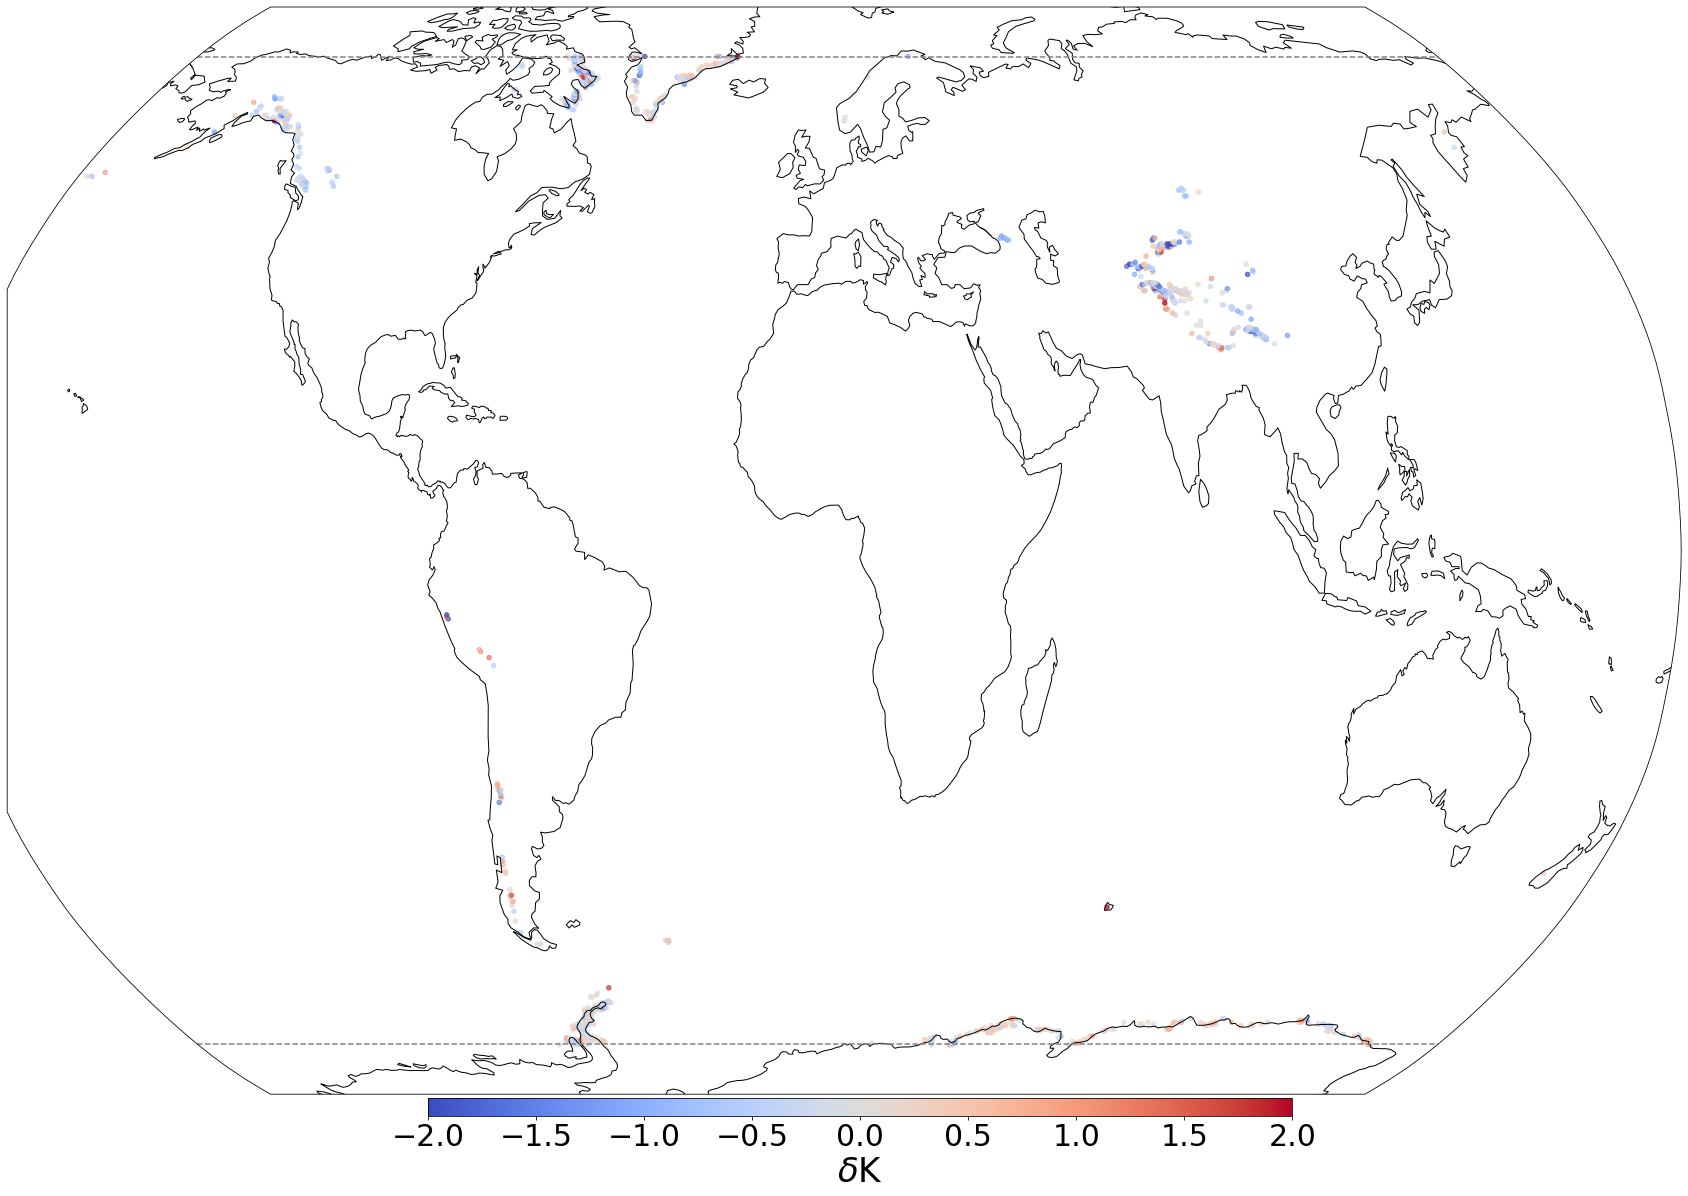

In [9]:
RobinsonPlot(df_000101,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/bitstring_000101.png')

In [18]:
#Alaskan gulf point
df_000101.sort_values(by=['delta'],ascending=False).iloc[0]

latitude_ERA                         59.99997
longitude_ERA                     -141.866667
MODIS_LST                          271.977448
V15_prediction                     277.694244
V20_prediction                     261.428802
V20X_prediction                    275.110748
V15_error                            6.214495
V20_error                           10.868941
V20X_error                           4.763571
delta                                4.654447
deltaX                              -1.450924
values                                  37428
step                          0 days 00:00:00
surface                                   0.0
latitude                             59.99997
longitude                         -141.866667
change_in_cl                          0.00121
V15_cl                                    0.0
V20_cl                                0.00121
percentage_change_in_cl                   inf
heightAboveGround                        10.0
change_in_si10                    

## Bitstring 010100 

In [20]:
df_010100 = df.query('bitstring == "010100"')

In [16]:
df_010100.sort_values(by=['delta'],ascending=False).iloc[4]

latitude_ERA                        -0.983606
longitude_ERA                        98.71875
MODIS_LST                          299.748657
V15_prediction                     299.439484
V20_prediction                     311.325012
V20X_prediction                    300.483948
V15_error                            2.597664
V20_error                           11.576346
V20X_error                           2.598799
delta                                8.978683
deltaX                               0.001135
values                                 275231
step                          0 days 00:00:00
surface                                   0.0
latitude                            -0.983606
longitude                            98.71875
change_in_cl                         0.000036
V15_cl                                    0.0
V20_cl                               0.000036
percentage_change_in_cl                   inf
heightAboveGround                        10.0
change_in_si10                    

In [23]:
df_010100[['latitude_ERA', 'longitude_ERA', 'V15_cl', 'V15_cvh', 'V20_cvh']]

,latitude_ERA,longitude_ERA,V15_cl,V15_cvh,V20_cvh
4389,-37.798581,148.666667,0.000000,0.612854,0.0
38577,-2.107728,-54.000000,0.473621,0.533661,0.0
40088,-0.983606,98.718750,0.000000,0.521362,0.0
40808,-0.421546,132.187500,0.000000,0.493011,0.0
40928,-0.140515,-50.062500,0.000000,0.596222,0.0
44374,2.950819,112.218750,0.000000,0.591125,0.0
54271,11.662760,102.937500,0.000000,0.413391,0.0
69458,22.903974,-83.400000,0.000000,0.561340,0.0
86246,32.459005,34.880000,0.000000,0.413116,0.0
89842,34.426218,131.333333,0.000000,0.446869,0.0


In [29]:
df_010100.iloc[1].latitude

-2.10772769472398